In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import random

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
from mlxtend.frequent_patterns import association_rules


### Reading Association data

In [4]:
data = []

with open("Grocery_Items_61.csv", "r") as file_:
    csv_reader = csv.reader(file_)

    next(csv_reader)

    for row in csv_reader:
        row = list(filter(lambda x: x != '', row))
        data.append(row)

### Extracting association rules with 0.01 min support and 0.1 min confidence threshold

In [5]:
def fit_association_rules(dataset,support,confidence):
  encoder = TransactionEncoder()
  encoder_ary = encoder.fit(dataset).transform(dataset)
  df = pd.DataFrame(encoder_ary, columns=encoder.columns_)
  frequent_itemsets = fpgrowth(df, min_support=support, use_colnames=True)
  assoc_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
  return assoc_rules

In [6]:
assoc_rules = fit_association_rules(data,0.01,0.1)

In [7]:
assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(other vegetables),(whole milk),0.122500,0.155875,0.015625,0.127551,0.818290,-0.003470,0.967535,-0.201954
1,(whole milk),(other vegetables),0.155875,0.122500,0.015625,0.100241,0.818290,-0.003470,0.975261,-0.208275
2,(rolls/buns),(whole milk),0.107625,0.155875,0.013500,0.125436,0.804719,-0.003276,0.965195,-0.213798
3,(soda),(whole milk),0.097375,0.155875,0.011250,0.115533,0.741188,-0.003928,0.954388,-0.278944
4,(yogurt),(whole milk),0.086250,0.155875,0.010125,0.117391,0.753112,-0.003319,0.956398,-0.264039


### Finding the number of association rules extracted using msv and mct as 0.001, 0.005, 0.01 and 0.05, 0.075, 0.1 respectively

In [8]:
msv = [0.001, 0.005, 0.01]
mcv = [0.05, 0.075, 0.1]
h_map = []
for min_confidence in mcv:
  temp = []
  for min_support in msv:
    assoc_rules = fit_association_rules(data,min_support,min_confidence)
    temp.append(len(assoc_rules))
  h_map.append(temp)

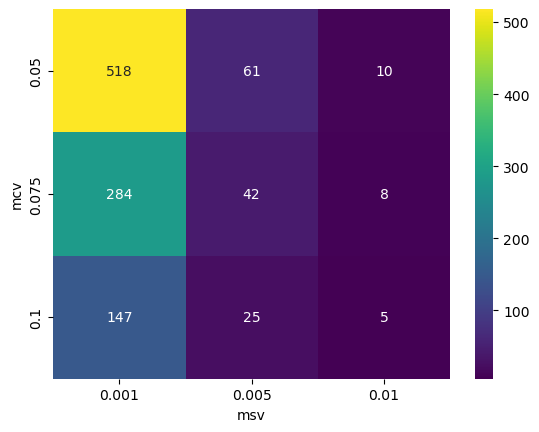

In [9]:
sns.heatmap(h_map, annot=True,fmt='d',cmap='viridis')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=msv)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=mcv)
plt.xlabel("msv")
plt.ylabel("mcv")
plt.show()

### Spliting the dataset and extracting association rules for each dataset with min support as 0.005 and min confidence threshold as 0.075

In [10]:
random.shuffle(data)

In [11]:
split_pt = len(data) // 2

dataset1 = data[:split_pt]
dataset2 = data[split_pt:]

In [15]:
rules_dataset1 = fit_association_rules(dataset1,0.005,0.075)

In [16]:
rules_dataset1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled water),(whole milk),0.06700,0.15275,0.00725,0.108209,0.708406,-0.002984,0.950054,-0.306124
1,(bottled water),(soda),0.06700,0.09550,0.00600,0.089552,0.937720,-0.000399,0.993467,-0.066455
2,(bottled water),(rolls/buns),0.06700,0.10625,0.00550,0.082090,0.772608,-0.001619,0.973679,-0.239806
3,(bottled water),(other vegetables),0.06700,0.12100,0.00625,0.093284,0.770939,-0.001857,0.969432,-0.241537
4,(pastry),(rolls/buns),0.05250,0.10625,0.00500,0.095238,0.896359,-0.000578,0.987829,-0.108760
5,(brown bread),(whole milk),0.04225,0.15275,0.00575,0.136095,0.890963,-0.000704,0.980721,-0.113302
6,(pip fruit),(whole milk),0.05300,0.15275,0.00675,0.127358,0.833771,-0.001346,0.970903,-0.173914
7,(pip fruit),(soda),0.05300,0.09550,0.00550,0.103774,1.086634,0.000438,1.009232,0.084189
8,(pip fruit),(rolls/buns),0.05300,0.10625,0.00500,0.094340,0.887902,-0.000631,0.986849,-0.117633
9,(domestic eggs),(whole milk),0.03575,0.15275,0.00575,0.160839,1.052957,0.000289,1.009640,0.052158


In [17]:
rules_dataset2 = fit_association_rules(dataset2,0.005,0.075)

In [18]:
rules_dataset2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(soda),(other vegetables),0.09925,0.12400,0.00825,0.083123,0.670350,-0.004057,0.955418,-0.353145
1,(soda),(whole milk),0.09925,0.15900,0.01075,0.108312,0.681210,-0.005031,0.943155,-0.341907
2,(root vegetables),(whole milk),0.06325,0.15900,0.00700,0.110672,0.696050,-0.003057,0.945658,-0.317948
3,(root vegetables),(rolls/buns),0.06325,0.10900,0.00525,0.083004,0.761504,-0.001644,0.971651,-0.250564
4,(root vegetables),(other vegetables),0.06325,0.12400,0.00625,0.098814,0.796889,-0.001593,0.972053,-0.213892
5,(tropical fruit),(whole milk),0.06600,0.15900,0.00900,0.136364,0.857633,-0.001494,0.973789,-0.150909
6,(tropical fruit),(rolls/buns),0.06600,0.10900,0.00500,0.075758,0.695024,-0.002194,0.964033,-0.319639
7,(tropical fruit),(other vegetables),0.06600,0.12400,0.00725,0.109848,0.885875,-0.000934,0.984102,-0.121212
8,(tropical fruit),(soda),0.06600,0.09925,0.00575,0.087121,0.877796,-0.000801,0.986714,-0.129720
9,(citrus fruit),(whole milk),0.05325,0.15900,0.00775,0.145540,0.915345,-0.000717,0.984247,-0.088992


In [19]:
pd.merge(rules_dataset1, rules_dataset2, on=['antecedents', 'consequents'])

,antecedents,consequents,antecedent support_x,consequent support_x,support_x,confidence_x,lift_x,leverage_x,conviction_x,zhangs_metric_x,antecedent support_y,consequent support_y,support_y,confidence_y,lift_y,leverage_y,conviction_y,zhangs_metric_y
0,(bottled water),(whole milk),0.06700,0.15275,0.00725,0.108209,0.708406,-0.002984,0.950054,-0.306124,0.06250,0.15900,0.00900,0.144000,0.905660,-0.000938,0.982477,-0.100000
1,(bottled water),(soda),0.06700,0.09550,0.00600,0.089552,0.937720,-0.000399,0.993467,-0.066455,0.06250,0.09925,0.00525,0.084000,0.846348,-0.000953,0.983352,-0.162234
2,(bottled water),(other vegetables),0.06700,0.12100,0.00625,0.093284,0.770939,-0.001857,0.969432,-0.241537,0.06250,0.12400,0.00500,0.080000,0.645161,-0.002750,0.952174,-0.369748
3,(pip fruit),(whole milk),0.05300,0.15275,0.00675,0.127358,0.833771,-0.001346,0.970903,-0.173914,0.04900,0.15900,0.00625,0.127551,0.802208,-0.001541,0.963953,-0.205885
4,(pip fruit),(rolls/buns),0.05300,0.10625,0.00500,0.094340,0.887902,-0.000631,0.986849,-0.117633,0.04900,0.10900,0.00650,0.132653,1.217001,0.001159,1.027271,0.187495
5,(domestic eggs),(whole milk),0.03575,0.15275,0.00575,0.160839,1.052957,0.000289,1.009640,0.052158,0.03950,0.15900,0.00600,0.151899,0.955338,-0.000281,0.991627,-0.046414
6,(other vegetables),(whole milk),0.12100,0.15275,0.01550,0.128099,0.838620,-0.002983,0.971727,-0.179605,0.12400,0.15900,0.01575,0.127016,0.798844,-0.003966,0.963363,-0.223273
7,(whole milk),(other vegetables),0.15275,0.12100,0.01550,0.101473,0.838620,-0.002983,0.978268,-0.185090,0.15900,0.12400,0.01575,0.099057,0.798844,-0.003966,0.972314,-0.230424
8,(citrus fruit),(rolls/buns),0.05700,0.10625,0.00500,0.087719,0.825593,-0.001056,0.979688,-0.183019,0.05325,0.10900,0.00500,0.093897,0.861438,-0.000804,0.983332,-0.145224
9,(citrus fruit),(whole milk),0.05700,0.15275,0.00750,0.131579,0.861401,-0.001207,0.975621,-0.145756,0.05325,0.15900,0.00775,0.145540,0.915345,-0.000717,0.984247,-0.088992
